In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [3]:
data = pd.read_csv("jfk_weather_cleaned.csv")

In [4]:
data.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,2010-01-01 02:51:00,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,2010-01-01 03:51:00,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,2010-01-01 04:51:00,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [20]:
data.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [21]:
data.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


There are no missing values.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


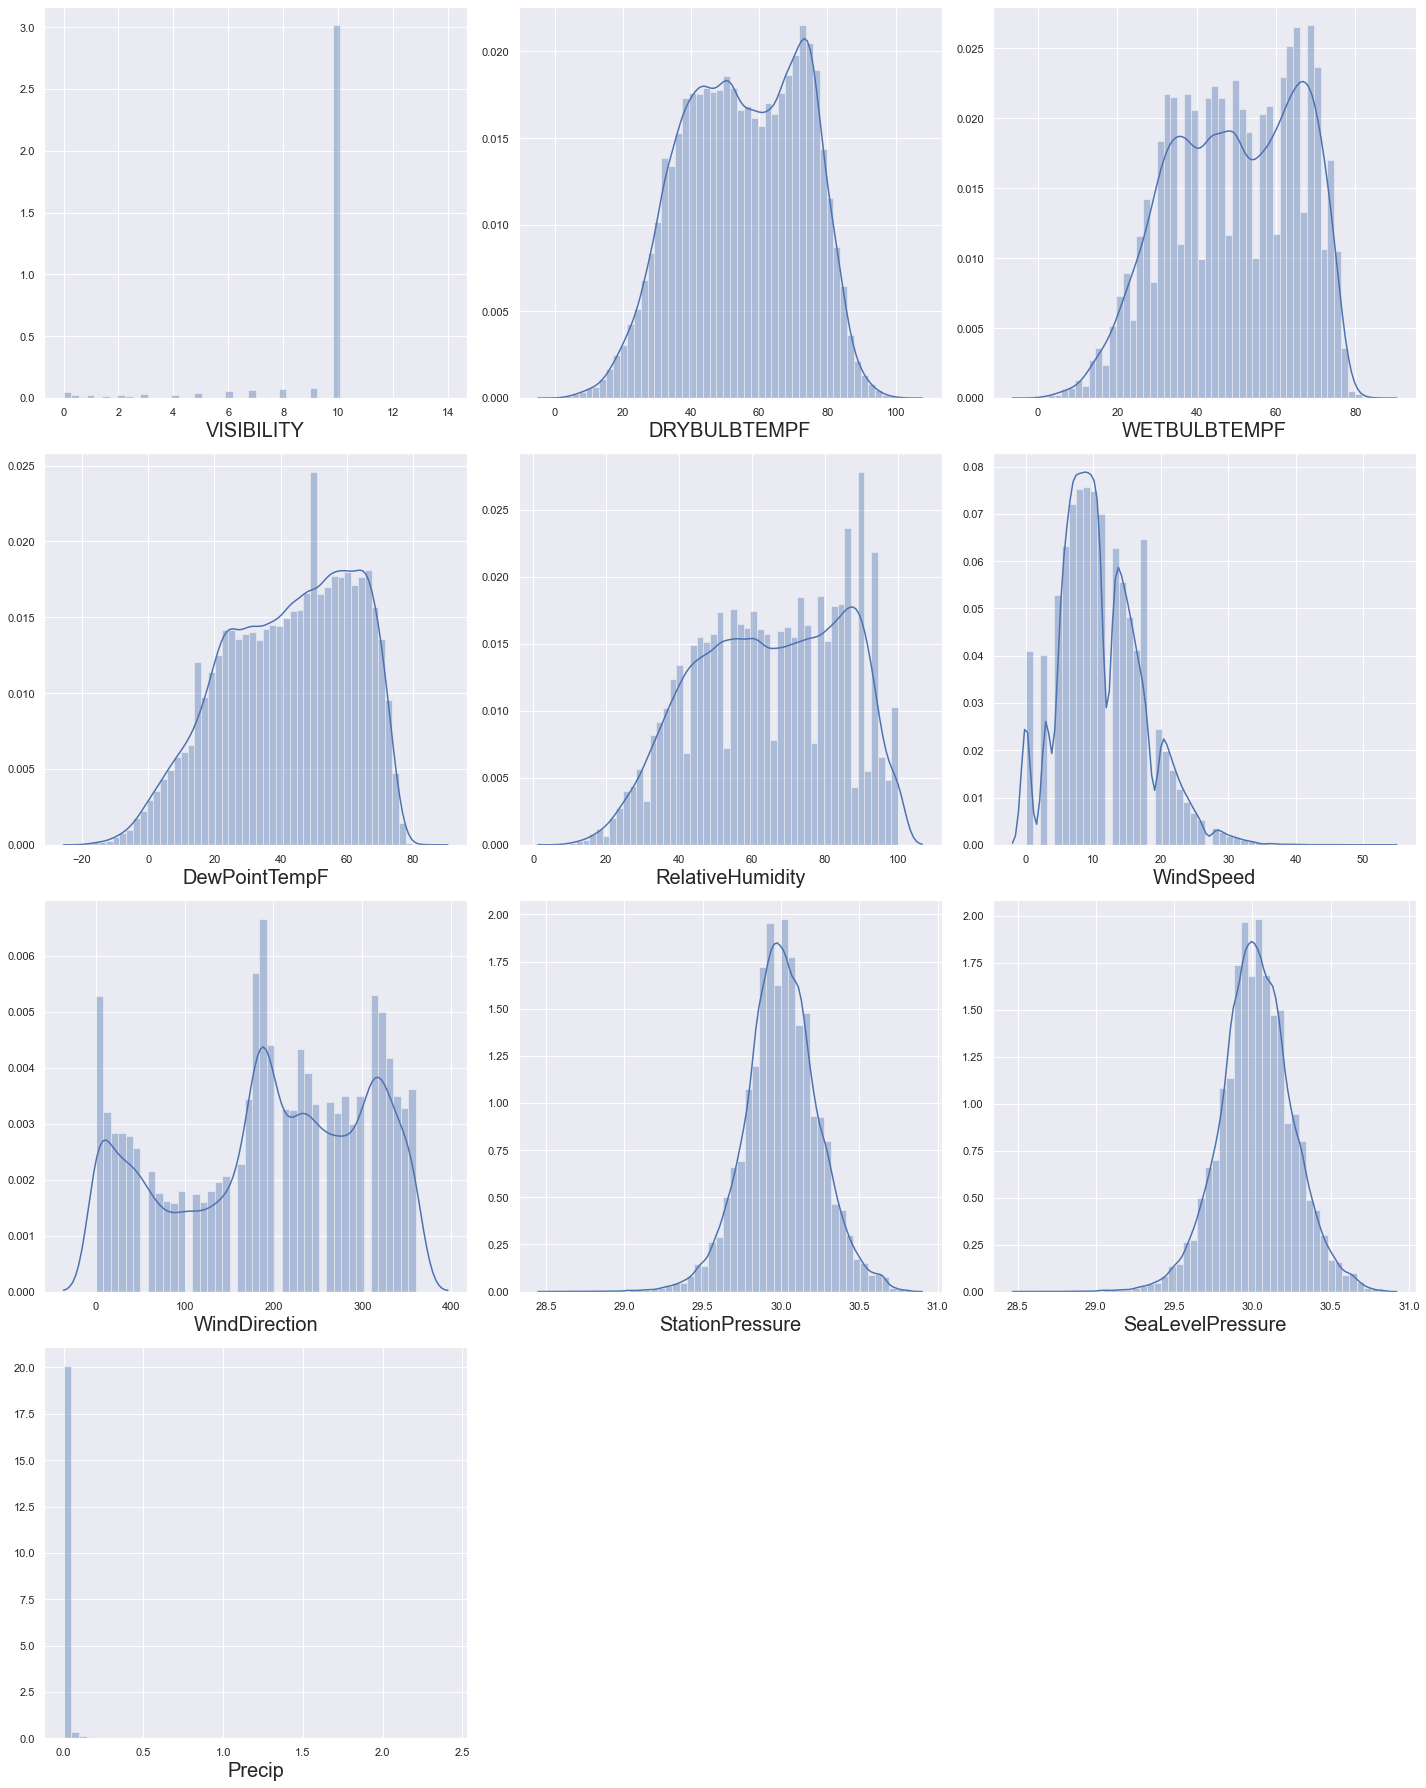

In [22]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
#let's scale our data
scale = StandardScaler()

In [26]:
X = data.drop(['DATE','VISIBILITY'],axis=1)
y = data['VISIBILITY']

In [27]:
X_scaled = scale.fit_transform(X)

In [28]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [29]:
X_scaled.describe()

,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04,7.508300e+04
mean,-2.413982e-15,-2.010512e-15,-2.679528e-14,1.252707e-15,2.171260e-15,3.301717e-15,-5.483315e-14,-1.423422e-15,-8.783367e-15
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.124919e+00,-3.109948e+00,-3.137428e+00,-2.855046e+00,-1.844489e+00,-1.825118e+00,-6.317020e+00,-6.348814e+00,-1.514946e-01
25%,-7.678141e-01,-8.235644e-01,-7.878313e-01,-7.946234e-01,-6.971373e-01,-8.036872e-01,-6.190362e-01,-6.239605e-01,-1.514946e-01
50%,3.705101e-02,4.155384e-02,8.049800e-02,5.969825e-02,-2.054152e-01,3.202881e-02,-2.372442e-02,-2.584147e-02,-1.514946e-01
75%,8.419161e-01,9.066721e-01,8.466709e-01,8.637657e-01,6.141216e-01,8.677448e-01,6.141096e-01,6.150004e-01,-1.514946e-01
max,2.681608e+00,2.204349e+00,2.123626e+00,1.768341e+00,6.842602e+00,1.517746e+00,3.505624e+00,3.520150e+00,6.649481e+01


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


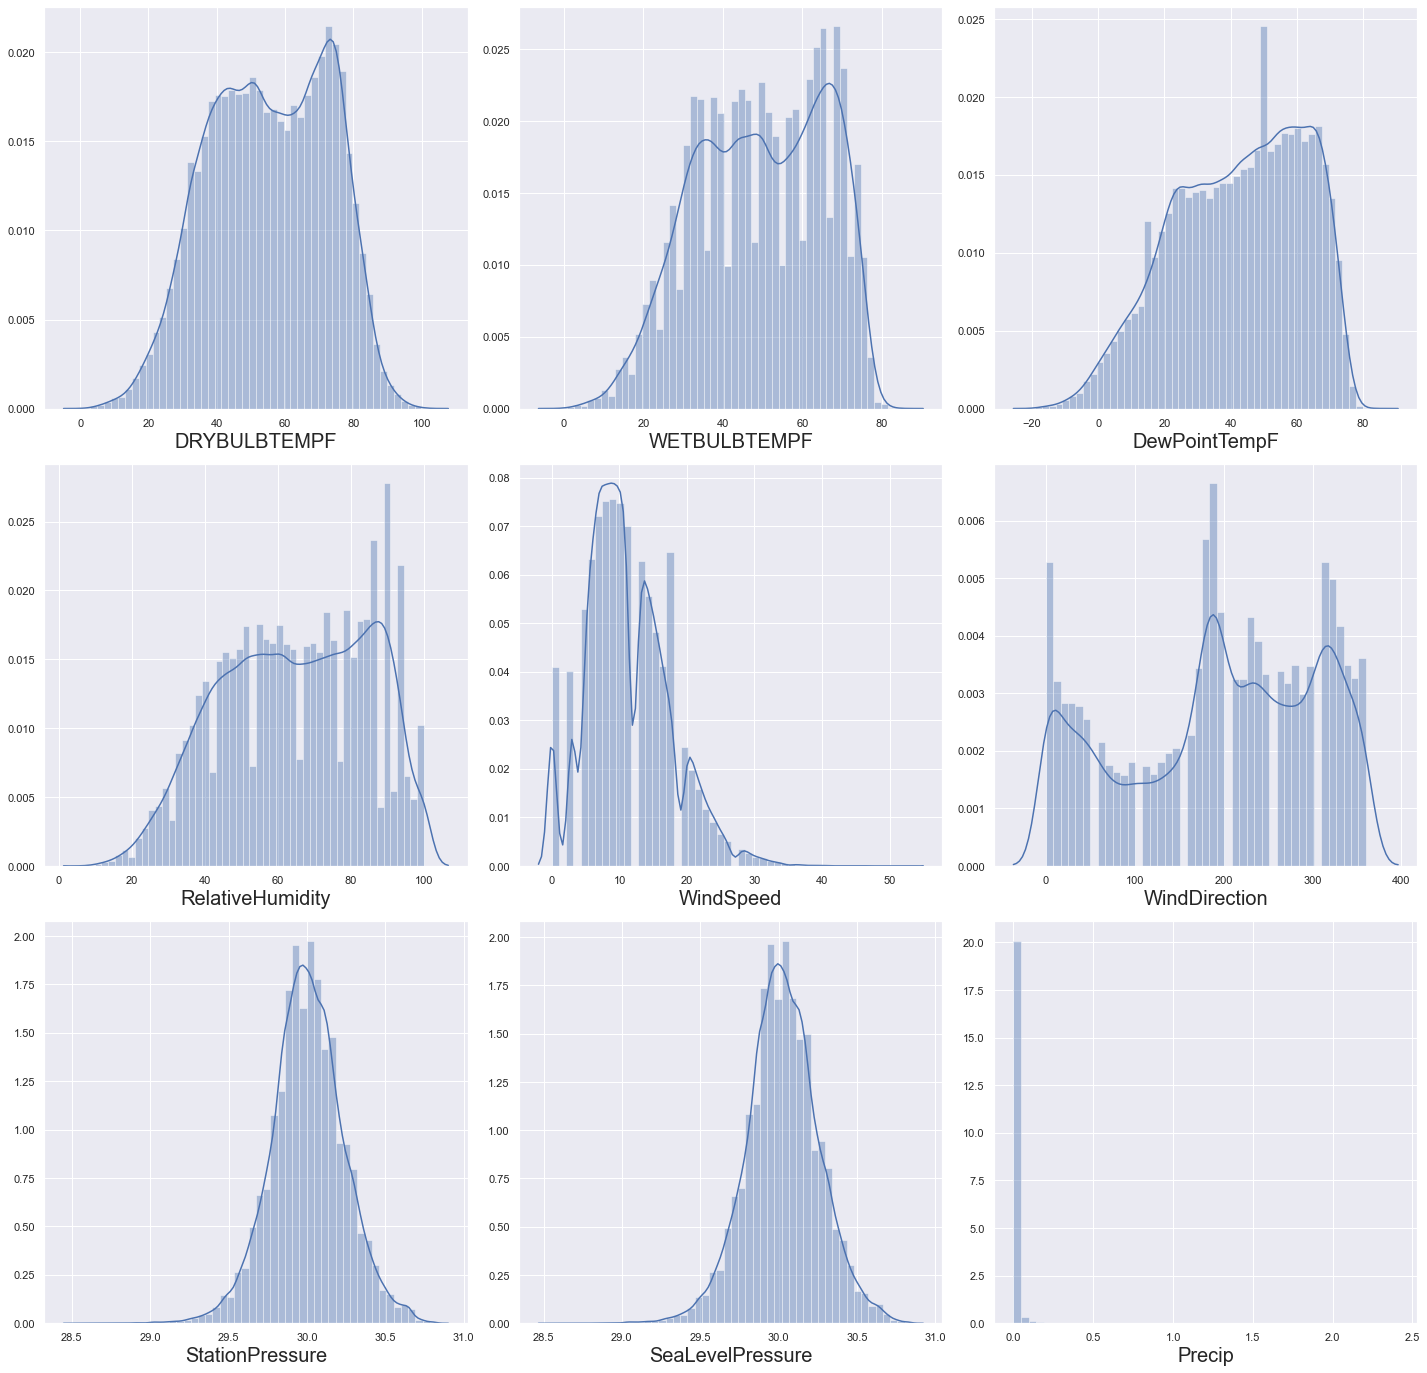

In [30]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see some columns are not following normal distribution.

we will use such algorithms which do not require normal distribution such as decision tree and XGBoost.

Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. 
Let's drop this column.

Let's check correlation between the columns :

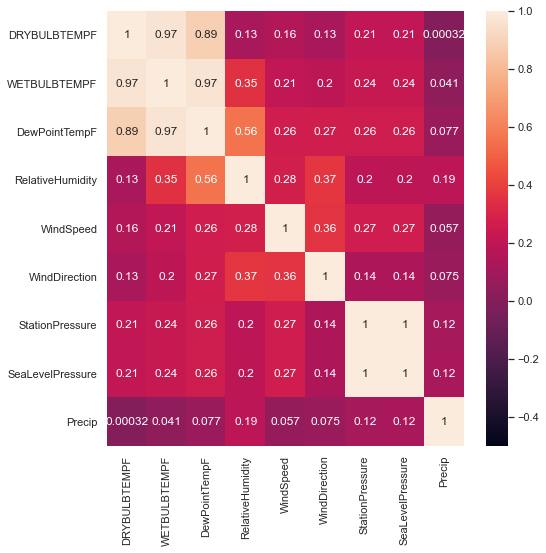

In [31]:
plt.figure(figsize=(8,8))
plt_data =X
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , there is an issue with 3.1.1 , annotation gets cut from top and bottom

There is clear correaltion between some columns.

Let's drop the columns with high correlaion.

In [32]:
X = X.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

In [33]:
X.head()

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Precip
0,33,92,0,0,29.99,0.01
1,33,96,0,0,29.99,0.02
2,33,96,0,0,29.99,0.02
3,33,96,0,0,29.97,0.02
4,33,92,0,0,29.96,0.02


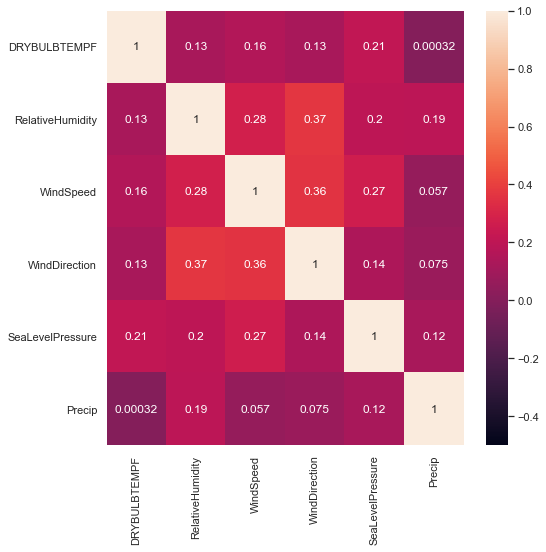

In [34]:
plt.figure(figsize=(8,8))
plt_data =X
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther eis an issue with 3.1.1 , annotation gets cut from top and bottom

#     plot.xlabel(column,fontsize=20)
#     #plt.ylabel('Salary',fontsize=20)
#     plot.ylabel("Calories")
#     plotnumber+=1

In [35]:
import seaborn as sns

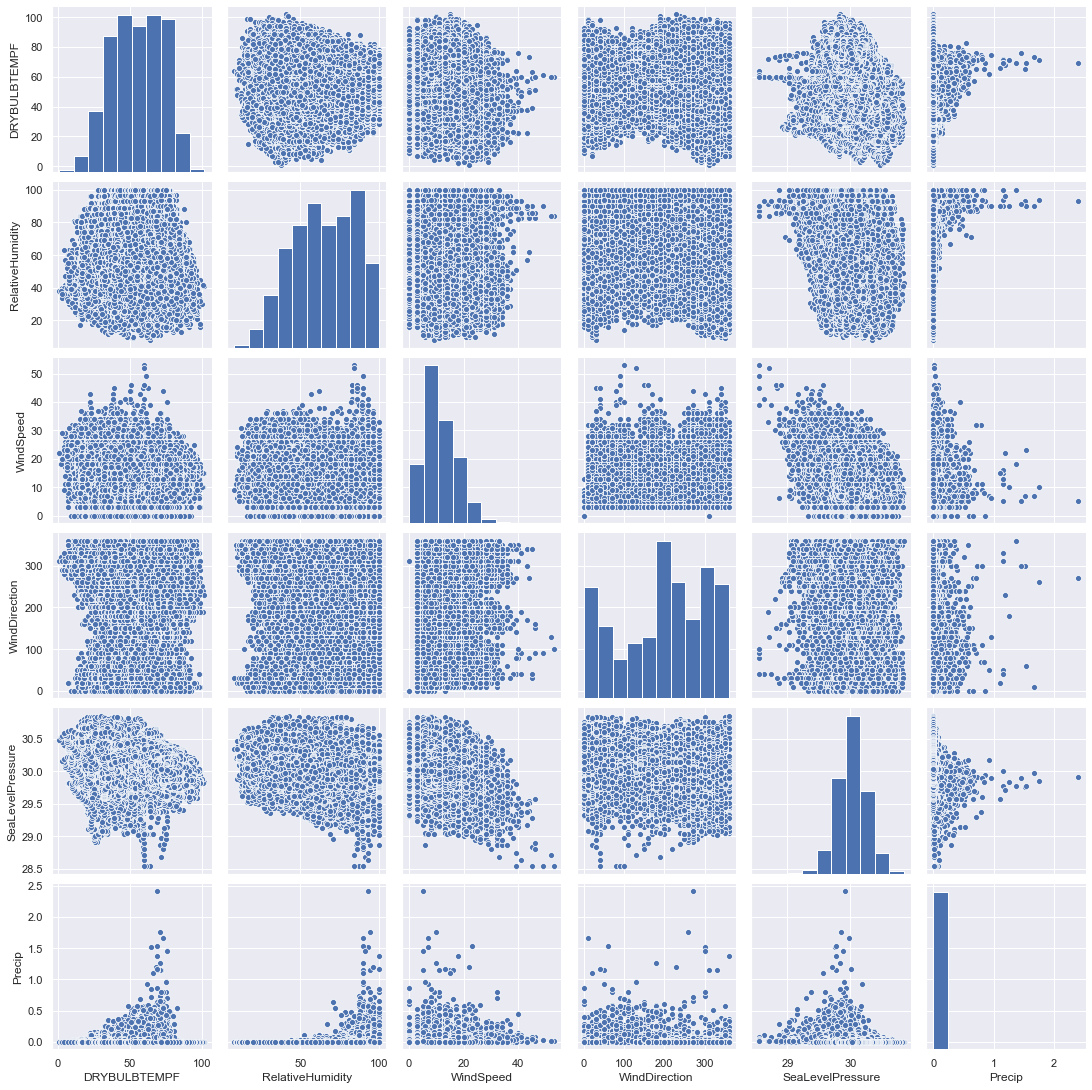

In [36]:
sns.pairplot(X)

Here in the graph we can see that data is not distributed linearly except 2-3 features pair, now we can't use linear regression algorithm it will give ous poor r2-score.

Let's create clusters of dataset.

But before clustering lets get number of clusters, by ploting an elbo plot.

In [37]:
from sklearn.cluster import KMeans

What is precompute_distance?

For each kmeans iteration, we need to find the closest cluster to each sample to perform labeling. If pre_compute == True, this is done via metrics.pairwise_distances_argmin_min(). If pre_compute == False, it is done via cluster._k_means._assign_labels_array()

https://github.com/scikit-learn/scikit-learn/blob/a24c8b464d094d2c468a16ea9f8bf8d42d949f84/sklearn/cluster/k_means_.py#L618

The first method uses matrix operations, while the latter computes pairwise distances one pair at a time. That's why precompute = True will be faster but will use more memory.

These minimum distances can not be cached between iterations because the kmeans centers will be changing .

In [38]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,precompute_distances=True,random_state=33)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


926027631.9956511


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


296371545.9307654


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


129615451.02482899


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


96718471.60064976


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


76438667.40933138


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


67300111.4453086


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


60736575.39076164


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


56211147.17372175


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


53140588.83463594


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


49886251.7633776


In [39]:
wcss

[926027631.9956511,
 296371545.9307654,
 129615451.02482899,
 96718471.60064976,
 76438667.40933138,
 67300111.4453086,
 60736575.39076164,
 56211147.17372175,
 53140588.83463594,
 49886251.7633776]

In [40]:
import matplotlib.pyplot as plt

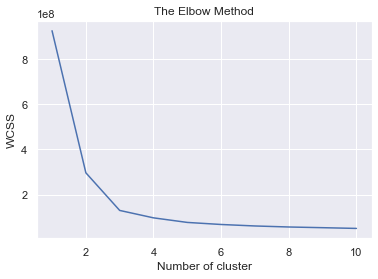

In [41]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

Let's take number of clusters as 3

In [42]:
cluster = KMeans(n_clusters=3,init='k-means++',precompute_distances=True,random_state=33) # created an object
cluster_pred = cluster.fit_predict(X)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "


In [43]:
print(cluster_pred)

[1 1 1 ... 1 1 1]


Now, append this this prediction array in dataset 

In [44]:
X['cluster'] = cluster_pred
X['Labels'] = y

new_dataset = X
X.head(10)

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Precip,cluster,Labels
0,33,92,0,0,29.99,0.01,1,6.00
1,33,96,0,0,29.99,0.02,1,6.00
2,33,96,0,0,29.99,0.02,1,5.00
3,33,96,0,0,29.97,0.02,1,5.00
4,33,92,0,0,29.96,0.02,1,5.00
5,33,92,0,0,29.97,0.02,1,5.00
6,33,96,0,0,29.96,0.00,1,4.00
7,33,96,3,270,29.95,0.00,0,1.25
8,34,92,3,250,29.94,0.00,2,2.50
9,35,89,6,250,29.93,0.00,2,2.50


#### For Cluster 0

Let's filter the data as per the clusters.

In [45]:
cluster1_data = new_dataset[new_dataset['cluster']==1]

In [46]:
cluster1_features = cluster1_data.drop(['cluster','Labels'],axis=1)
cluster1_label = cluster1_data['Labels']

In [47]:
cluster1_features.head()

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure,Precip
0,33,92,0,0,29.99,0.01
1,33,96,0,0,29.99,0.02
2,33,96,0,0,29.99,0.02
3,33,96,0,0,29.97,0.02
4,33,92,0,0,29.96,0.02


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(cluster1_features,cluster1_label,test_size = 0.33,random_state = 33)

### Let's first applay linear regraession.

!!!Just to prove linear regression will give poor accuracy we are trying it.

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [51]:
linearReg = LinearRegression()

In [52]:
prams={
    'fit_intercept':[True,False], 'copy_X':[True,False], 'normalize':[True,False]
}
grid = GridSearchCV(estimator=linearReg,param_grid=prams,n_jobs=-1,cv=5,verbose=55)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   31

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=55)

In [53]:
best_fit_intercept = grid.best_params_['fit_intercept']
best_copy_X = grid.best_params_['copy_X']
best_normalize = grid.best_params_['normalize']

print(best_fit_intercept)
print(best_copy_X)
print(best_normalize)

True
True
False


so, now we got the best parems we will create a new model with best params.

What is fit_intercept?

link-- https://www.analyticsinsight.net/why-is-intercept-important-in-regression-analysis/#:~:text=The%20Importance%20of%20Intercept,to%20Y%20%3D%20bX%20%2B%20error.

In [54]:
lin_Reg = LinearRegression(fit_intercept=True,copy_X=True,normalize=False)
lin_Reg.fit(X_train,Y_train)

LinearRegression()

In [55]:
predict_lin_Reg = lin_Reg.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,accuracy_score

In [57]:
LinearReg_error = r2_score(Y_test,predict_lin_Reg)
print(LinearReg_error)

0.3247164236411568


In [58]:
accuracy = accuracy_score(Y_test,predict_lin_Reg)
accuracy

ValueError: continuous is not supported

### error: It's because accuracy_score is for classification tasks only. For regression you should use something different, for example r2_Score

### Socre is 0.324(i.e 32%) it's just no use let's try another algo!!

### DecisionTreeRegressor algorithm.

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
scr = DecisionTreeRegressor()

In [63]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid_knn = {"criterion" : ["mse", "friedman_mse", "mae"],
"splitter" : ["best", "random"],
"max_features" :["auto", "sqrt", "log2"],
'max_depth': range(2,16,2),
'min_samples_split': range(2,16,2)    
                 }
    
    

In [75]:
grid =GridSearchCV(scr,param_grid_knn, verbose=3,cv=5)
            # finding the best parameters



In [76]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 882 candidates, totalling 4410 fits
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.445, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.496, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.471, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best, score=0.496, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best, score=0.471, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=best, score=0.415, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=4, splitter=random, score=0.324, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_

[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best, score=0.496, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best, score=0.471, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=best, score=0.415, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=auto, min_samples_split=12, splitter=random, score=0.310, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=auto, min

[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=6, splitter=random, score=0.299, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best, score=0.381, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best, score=0.511, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best, score=0.436, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=8, splitter=best, score=0.299, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=sqrt, min_samples_sp

[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best, score=0.496, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best, score=0.428, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best, score=0.298, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=best, score=0.302, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=2, splitter=random, score=0.014, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_

[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=10, splitter=random, score=0.015, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=10, splitter=random, score=0.063, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=12, splitter=best, score=0.308, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=12, splitter=best, score=0.278, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=2, max_features=log2, min_samples_split=12, splitter=best, score=0.413, total=   0.0s
[CV] criterion=mse, max_depth=2, max_features=log2, m

[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.371, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.444, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.339, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.386, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.312, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=auto

[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best, score=0.538, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best, score=0.500, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best, score=0.414, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=best, score=0.422, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=2, splitter=random, score=0.168, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_

[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=10, splitter=random, score=0.048, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best, score=0.443, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best, score=0.499, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best, score=0.502, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=sqrt, min_samples_split=12, splitter=best, score=0.323, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=sqrt, min_s

[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best, score=0.312, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best, score=0.309, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best, score=0.198, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=best, score=0.468, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=random, score=0.380, total=   0.0s
[CV] criterion=mse, max_depth=4, max_features=log2, min_samples_

[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=best, score=0.560, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=best, score=0.549, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=best, score=0.511, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=random, score=0.480, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=2, splitter=random, score=0.488, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samp

[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=10, splitter=random, score=0.444, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best, score=0.546, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best, score=0.580, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best, score=0.560, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=auto, min_samples_split=12, splitter=best, score=0.549, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=auto, min_s

[CV]  criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.479, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.529, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.504, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.454, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.478, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=sqrt, min_samples_spli

[CV]  criterion=mse, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random, score=0.170, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best, score=0.485, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best, score=0.543, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best, score=0.553, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=2, splitter=best, score=0.401, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_s

[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=8, splitter=random, score=0.356, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best, score=0.495, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best, score=0.492, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best, score=0.528, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=mse, max_depth=6, max_features=log2, min_samples_split=10, splitter=best, score=0.537, total=   0.0s
[CV] criterion=mse, max_depth=6, max_features=log2, min_sa

[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=best, score=0.526, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=best, score=0.496, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=random, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=random, score=0.524, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=4, splitter=random, score=0.532, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_

[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=best, score=0.497, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random, score=0.507, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random, score=0.549, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random, score=0.526, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=auto, min_samples_split=12, splitter=random, score=0.494, total=   0.0s
[CV] criterion=mse, max_depth=8, max_featur

[CV]  criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random, score=0.204, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random, score=0.372, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random, score=0.256, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=6, splitter=random, score=0.435, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best, score=0.521, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, mi

[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.286, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.313, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.255, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.356, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.370, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2

[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random, score=0.356, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best, score=0.503, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best, score=0.572, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best, score=0.528, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=8, max_features=log2, min_samples_split=12, splitter=best, score=0.532, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, min_s

[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=best, score=0.506, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=best, score=0.494, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=best, score=0.487, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=random, score=0.460, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=6, splitter=random, score=0.564, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto

[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=best, score=0.519, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=best, score=0.504, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=best, score=0.491, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=random, score=0.509, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=auto, min_samples_split=

[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random, score=0.270, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random, score=0.303, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random, score=0.443, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random, score=0.293, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=sqrt, min_samples_split=8, splitter=random, score=0.375, total=   0.0s
[CV] criterion=mse, max_depth=10, max_fea

[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=best, score=0.468, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=best, score=0.440, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=best, score=0.450, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=random, score=0.354, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=4, splitter=random, score=0.427, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2

[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=best, score=0.514, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=best, score=0.507, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=best, score=0.477, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=random, score=0.325, total=   0.0s
[CV] criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mse, max_depth=10, max_features=log2, min_samples_split=12, splitter=random, score=0.512, total=   0.0s
[CV] criterion=mse, max_depth=10, max_feat

[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.546, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.531, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.491, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.449, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best, score=0.498, total=   0.0s
[CV] criterion=mse, max_depth=12, max_feature

[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=14, splitter=random, score=0.513, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=auto, min_samples_split=14, splitter=random, score=0.463, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best, score=0.439, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best, score=0.430, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best, score=0.459, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqr

[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=best, score=0.464, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random, score=0.412, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random, score=0.338, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random, score=0.389, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, min_samples_split=10, splitter=random, score=0.431, total=   0.0s
[CV] criterion=mse, max_depth=12, 

[CV]  criterion=mse, max_depth=12, max_features=log2, min_samples_split=4, splitter=random, score=0.418, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best, score=0.457, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best, score=0.516, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best, score=0.494, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mse, max_depth=12, max_features=log2, min_samples_split=6, splitter=best, score=0.477, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, min_

[CV]  criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best, score=0.485, total=   0.1s
[CV] criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best, score=0.445, total=   0.1s
[CV] criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best, score=0.468, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best, score=0.401, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=auto, min_samples_split=8, splitter=best, score=0.418, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=auto, min_sa

[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random, score=0.381, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random, score=0.404, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random, score=0.448, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random, score=0.360, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=2, splitter=random, score=0.394, total=   0.0s
[CV] criterion=mse, max_depth=14, max_fea

[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.391, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.484, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.433, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.501, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.425, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=sqr

[CV]  criterion=mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random, score=0.460, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random, score=0.395, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=log2, min_samples_split=8, splitter=best, score=0.418, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=log2, min_samples_split=8, splitter=best, score=0.483, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=mse, max_depth=14, max_features=log2, min_samples_split=8, splitter=best, score=0.453, total=   0.0s
[CV] criterion=mse, max_depth=14, max_features=log2, 

[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.496, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.463, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.471, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=best, score=0.415, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=2, splitter=random, score=0.08

[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random, score=0.078, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random, score=0.393, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random, score=0.077, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random, score=0.235, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=auto, min_samples_split=10, spli

[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=best, score=0.453, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=best, score=0.393, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=random, score=0.029, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=random, score=0.216, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=4, splitter=random, sc

[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best, score=0.473, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best, score=0.155, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best, score=0.297, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=best, score=0.299, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=sqrt, min_samples_split=12, splitter=random, s

[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best, score=0.477, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best, score=0.483, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best, score=0.027, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best, score=0.251, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=6, splitter=best, score=0.023, t

[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=14, splitter=random, score=0.138, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=14, splitter=random, score=0.025, total=   0.0s
[CV] criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=2, max_features=log2, min_samples_split=14, splitter=random, score=0.013, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=2, splitter=best, score=0.528, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=2, splitter=best,

[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random, score=0.389, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random, score=0.209, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random, score=0.425, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random, score=0.417, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=auto, min_samples_split=8, splitter=rand

[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=best, score=0.363, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=best, score=0.453, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random, score=0.308, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random, score=0.207, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random, sc

[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best, score=0.230, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best, score=0.541, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best, score=0.331, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best, score=0.465, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=sqrt, min_samples_split=14, splitter=best, score

[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=6, splitter=random, score=0.065, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best, score=0.400, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best, score=0.483, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best, score=0.374, total=   0.0s
[CV] criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=4, max_features=log2, min_samples_split=8, splitter=best, score=0.487,

[CV]  criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=best, score=0.509, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random, score=0.502, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random, score=0.502, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random, score=0.509, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=auto, min_samples_split=8, splitter=random

[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=best, score=0.386, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=best, score=0.448, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=best, score=0.493, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=random, score=0.301, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=2, splitter=random, score=

[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random, score=0.237, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random, score=0.111, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=10, splitter=random, score=0.327, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=12, splitter=best, score=0.537, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=sqrt, min_samples_split=12, splitter=b

[CV]  criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best, score=0.489, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best, score=0.522, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best, score=0.497, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best, score=0.515, total=   0.0s
[CV] criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=6, max_features=log2, min_samples_split=6, splitter=best, score=0.483, t

[CV]  criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random, score=0.524, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random, score=0.520, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random, score=0.514, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=6, splitter=random, score=0.429, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=8, max_features=auto, min_samples_split=8, splitter=best, 

[CV]  criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best, score=0.546, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best, score=0.531, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best, score=0.508, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=best, score=0.484, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=sqrt, min_samples_split=8, splitter=random, score=0.41

[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=best, score=0.517, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=best, score=0.478, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.310, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, score=0.302, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=2, splitter=random, sc

[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random, score=0.462, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random, score=0.306, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random, score=0.361, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random, score=0.208, total=   0.0s
[CV] criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=8, max_features=log2, min_samples_split=10, spli

[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random, score=0.479, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random, score=0.532, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random, score=0.521, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random, score=0.520, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=4, spli

[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=best, score=0.523, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=best, score=0.503, total=   0.1s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=best, score=0.489, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=random, score=0.520, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=auto, min_samples_split=12, split

[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=best, score=0.484, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random, score=0.337, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random, score=0.514, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random, score=0.463, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=6, splitt

[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=best, score=0.517, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=best, score=0.481, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=best, score=0.460, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=random, score=0.324, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=10, max_features=sqrt, min_samples_split=14, split

[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=6, splitter=random, score=0.261, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best, score=0.454, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best, score=0.539, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best, score=0.527, total=   0.0s
[CV] criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=10, max_features=log2, min_samples_split=8, splitter=best, sco

[CV]  criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best, score=0.498, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best, score=0.450, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=best, score=0.469, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=random, score=0.542, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=auto, min_samples_split=8, splitter=rando

[CV]  criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best, score=0.411, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best, score=0.380, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=best, score=0.382, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=random, score=0.451, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=sqrt, min_samples_split=2, splitter=rando

[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=best, score=0.376, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random, score=0.399, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random, score=0.338, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random, score=0.448, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=2, splitt

[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=best, score=0.494, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=best, score=0.472, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=best, score=0.425, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=random, score=0.473, total=   0.0s
[CV] criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=friedman_mse, max_depth=12, max_features=log2, min_samples_split=10, split

[CV]  criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score=0.446, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score=0.409, total=   0.1s
[CV] criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score=0.434, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score=0.339, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score

[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=best, score=0.393, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=best, score=0.392, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=best, score=0.335, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=random, score=0.452, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=4, splitter=rando

[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.491, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=best, score=0.443, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=random, score=0.407, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=random, score=0.404, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=sqrt, min_samples_split=12, s

[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=best, score=0.386, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=best, score=0.358, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random, score=0.451, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random, score=0.480, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=6, splitter=r

[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=best, score=0.425, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=best 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=best, score=0.426, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=random, score=0.498, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=random, score=0.410, total=   0.0s
[CV] criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=friedman_mse, max_depth=14, max_features=log2, min_samples_split=14, s

[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=best, score=0.374, total=   1.5s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=best, score=0.367, total=   1.5s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=random, score=-0.063, total=   1.1s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=random, score=-0.160, total=   1.0s
[CV] criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=auto, min_samples_split=8, splitter=random, score=-0.105, total=   0.8s
[CV] criterion=mae, max_depth=2, max_features=auto, m

[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best, score=-0.171, total=   0.7s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best, score=-0.130, total=   0.7s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random, score=0.302, total=   0.5s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random, score=-0.199, total=   0.3s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random, score=-0.226, total=   0.2s
[CV] criterion=mae, max_depth=2, max_features=sqrt, 

[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best, score=0.232, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best, score=0.227, total=   0.7s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random, score=-0.236, total=   0.3s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random, score=-0.227, total=   0.4s
[CV] criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=random, score=-0.185, total=   0.4s
[CV] criterion=mae, max_depth=2, max_feature

[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=best, score=0.398, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=best, score=-0.120, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=random, score=-0.236, total=   0.2s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=random, score=-0.258, total=   0.1s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=4, splitter=random, score=-0.187, total=   0.3s
[CV] criterion=mae, max_depth=2, max_features=log2, 

[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=best, score=0.334, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=best, score=0.228, total=   0.7s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=random, score=-0.233, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=random, score=0.333, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=2, max_features=log2, min_samples_split=12, splitter=random, score=-0.226, total=   0.6s
[CV] criterion=mae, max_depth=2, max_features

[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=best, score=0.398, total=   2.3s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=best, score=0.376, total=   2.3s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.369, total=   2.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.335, total=   2.0s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=6, splitter=random, score=0.267, total=   1.7s
[CV] criterion=mae, max_depth=4, max_features=auto, min_

[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=best, score=0.398, total=   2.3s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=best, score=0.383, total=   2.3s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=random, score=0.403, total=   1.7s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=random, score=-0.228, total=   1.9s
[CV] criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=auto, min_samples_split=14, splitter=random, score=0.205, total=   2.1s
[CV] criterion=mae, max_depth=4, max_features=

[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=best, score=0.361, total=   0.9s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=best, score=0.324, total=   1.3s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=random, score=-0.224, total=   0.9s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=random, score=0.228, total=   0.7s
[CV] criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=8, splitter=random, score=-0.211, total=   0.5s
[CV] criterion=mae, max_depth=4, max_features=sqrt, mi

[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=best, score=0.350, total=   0.8s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=best, score=0.200, total=   0.9s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=random, score=0.031, total=   0.9s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=random, score=-0.240, total=   0.7s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=random, score=-0.162, total=   0.5s
[CV] criterion=mae, max_depth=4, max_features=log2, mi

[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=best, score=0.382, total=   1.0s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=best, score=0.433, total=   0.8s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=random, score=0.319, total=   0.5s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=random, score=-0.249, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=4, max_features=log2, min_samples_split=10, splitter=random, score=-0.143, total=   0.6s
[CV] criterion=mae, max_depth=4, max_features

[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=best, score=0.397, total=   3.0s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=best, score=0.380, total=   3.1s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=random, score=-0.014, total=   2.8s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=random, score=-0.205, total=   2.9s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=4, splitter=random, score=0.254, total=   2.3s
[CV] criterion=mae, max_depth=6, max_features=auto, mi

[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=best, score=0.398, total=   2.8s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=best, score=0.380, total=   3.0s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=random, score=0.234, total=   2.9s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=random, score=0.215, total=   2.8s
[CV] criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=auto, min_samples_split=12, splitter=random, score=0.303, total=   2.3s
[CV] criterion=mae, max_depth=6, max_features=a

[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.405, total=   0.8s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=best, score=0.362, total=   1.0s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=random, score=-0.075, total=   1.5s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=random, score=0.419, total=   1.0s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=6, splitter=random, score=-0.226, total=   0.4s
[CV] criterion=mae, max_depth=6, max_features=sqrt, mi

[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=best, score=0.434, total=   1.1s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=best, score=0.306, total=   1.5s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random, score=0.252, total=   1.1s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random, score=-0.191, total=   0.3s
[CV] criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=sqrt, min_samples_split=14, splitter=random, score=-0.226, total=   0.2s
[CV] criterion=mae, max_depth=6, max_features

[CV]  criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=best, score=0.414, total=   0.8s
[CV] criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=best, score=-0.178, total=   0.7s
[CV] criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=random, score=0.356, total=   0.9s
[CV] criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=random, score=-0.258, total=   0.2s
[CV] criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=6, max_features=log2, min_samples_split=8, splitter=random, score=-0.182, total=   1.0s
[CV] criterion=mae, max_depth=6, max_features=log2, m

[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=best, score=0.394, total=   2.9s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=best, score=0.337, total=   3.6s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=random, score=0.345, total=   1.6s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=random, score=0.395, total=   2.8s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=2, splitter=random, score=0.476, total=   2.7s
[CV] criterion=mae, max_depth=8, max_features=auto, min_

[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=best, score=0.379, total=   2.8s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=best, score=0.349, total=   3.5s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=random, score=0.306, total=   3.3s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=random, score=0.337, total=   2.3s
[CV] criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=auto, min_samples_split=10, splitter=random, score=0.285, total=   3.6s
[CV] criterion=mae, max_depth=8, max_features=a

[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=best, score=0.406, total=   1.2s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=best, score=0.305, total=   1.6s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=random, score=-0.113, total=   1.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=random, score=0.198, total=   1.3s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=4, splitter=random, score=-0.226, total=   0.5s
[CV] criterion=mae, max_depth=8, max_features=sqrt, mi

[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=best, score=0.412, total=   1.9s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=best, score=0.366, total=   1.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=random, score=0.114, total=   0.6s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=random, score=0.455, total=   1.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=sqrt, min_samples_split=12, splitter=random, score=-0.015, total=   1.0s
[CV] criterion=mae, max_depth=8, max_features=

[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=best, score=0.398, total=   1.3s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=best, score=0.412, total=   1.3s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=random, score=-0.129, total=   0.9s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=random, score=0.454, total=   1.3s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=6, splitter=random, score=0.397, total=   1.1s
[CV] criterion=mae, max_depth=8, max_features=log2, min

[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=best, score=0.412, total=   1.1s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=best 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=best, score=0.361, total=   1.3s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=random, score=-0.236, total=   0.7s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=random, score=-0.255, total=   0.8s
[CV] criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=8, max_features=log2, min_samples_split=14, splitter=random, score=-0.188, total=   0.4s
[CV] criterion=mae, max_depth=8, max_feature

[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=best, score=0.362, total=   3.7s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=best, score=0.397, total=   4.0s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=random, score=0.420, total=   3.1s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=random, score=0.368, total=   2.8s
[CV] criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=auto, min_samples_split=8, splitter=random, score=0.338, total=   3.5s
[CV] criterion=mae, max_depth=10, max_features=

[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best, score=0.388, total=   1.5s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=best, score=0.420, total=   1.6s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random, score=0.350, total=   1.1s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random, score=0.373, total=   2.0s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=2, splitter=random, score=-0.226, total=   0.2s
[CV] criterion=mae, max_depth=10, max_features

[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=best, score=0.401, total=   1.8s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=best, score=0.366, total=   0.8s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random, score=-0.236, total=   0.2s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random, score=-0.077, total=   0.8s
[CV] criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=sqrt, min_samples_split=10, splitter=random, score=0.254, total=   0.9s
[CV] criterion=mae, max_depth=10, ma

[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=best, score=0.454, total=   1.4s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=best, score=0.370, total=   1.5s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=random, score=0.364, total=   1.4s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=random, score=-0.258, total=   0.5s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=4, splitter=random, score=0.005, total=   1.6s
[CV] criterion=mae, max_depth=10, max_features

[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=best, score=0.427, total=   0.9s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=best 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=best, score=0.374, total=   1.2s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=random, score=-0.089, total=   1.2s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=random, score=0.376, total=   1.1s
[CV] criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=10, max_features=log2, min_samples_split=12, splitter=random, score=-0.065, total=   1.1s
[CV] criterion=mae, max_depth=10, ma

[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=best, score=0.361, total=   3.1s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=best, score=0.329, total=   4.5s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.419, total=   1.8s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.323, total=   4.7s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=6, splitter=random, score=0.417, total=   1.8s
[CV] criterion=mae, max_depth=12, max_features=

[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=best, score=0.405, total=   3.5s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=best, score=0.351, total=   4.1s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=random, score=0.391, total=   4.2s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=random, score=0.393, total=   2.7s
[CV] criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=auto, min_samples_split=14, splitter=random, score=0.405, total=   2.4s
[CV] criterion=mae, max_depth=12, max_

[CV]  criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=best, score=0.383, total=   1.3s
[CV] criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=best, score=0.343, total=   1.7s
[CV] criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=random, score=0.291, total=   1.4s
[CV] criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=random, score=0.289, total=   1.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, min_samples_split=8, splitter=random, score=-0.226, total=   0.3s
[CV] criterion=mae, max_depth=12, max_features

[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=best, score=0.357, total=   1.8s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=best, score=0.359, total=   1.9s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=random, score=-0.236, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=random, score=-0.258, total=   0.2s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=2, splitter=random, score=0.009, total=   1.3s
[CV] criterion=mae, max_depth=12, max_feature

[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=best, score=0.372, total=   1.3s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=best 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=best, score=0.363, total=   1.1s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=random, score=0.392, total=   0.7s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=random, score=-0.199, total=   0.5s
[CV] criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=random 
[CV]  criterion=mae, max_depth=12, max_features=log2, min_samples_split=10, splitter=random, score=-0.226, total=   0.3s
[CV] criterion=mae, max_depth=12, ma

[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score=0.376, total=   4.6s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=best 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=best, score=0.261, total=   4.9s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=random, score=0.353, total=   2.9s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=random, score=0.389, total=   2.4s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=4, splitter=random, score=0.380, total=   2.6s
[CV] criterion=mae, max_depth=14, max_features=

[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=best, score=0.377, total=   3.2s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=best 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=best, score=0.329, total=   4.8s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=random, score=0.406, total=   1.3s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=random, score=0.406, total=   3.9s
[CV] criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=auto, min_samples_split=12, splitter=random, score=0.419, total=   4.8s
[CV] criterion=mae, max_depth=14, max_

[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=best, score=0.356, total=   1.2s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=best 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=best, score=0.358, total=   2.0s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=random, score=0.390, total=   0.5s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=random, score=-0.189, total=   0.9s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=6, splitter=random, score=0.344, total=   1.8s
[CV] criterion=mae, max_depth=14, max_features

[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=best, score=0.318, total=   2.3s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=best 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=best, score=0.348, total=   1.2s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=random, score=-0.201, total=   0.4s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=random, score=-0.242, total=   0.5s
[CV] criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=sqrt, min_samples_split=14, splitter=random, score=-0.226, total=   0.2s
[CV] criterion=mae, max_depth=14, m

[CV]  criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=best, score=0.378, total=   1.0s
[CV] criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=best 
[CV]  criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=best, score=0.267, total=   1.5s
[CV] criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=random, score=-0.054, total=   1.0s
[CV] criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=random, score=-0.171, total=   0.5s
[CV] criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=random 
[CV]  criterion=mae, max_depth=14, max_features=log2, min_samples_split=8, splitter=random, score=-0.038, total=   2.1s
[CV] criterion=mae, max_depth=14, max_featur

[Parallel(n_jobs=1)]: Done 4410 out of 4410 | elapsed: 40.0min finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': range(2, 16, 2),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(2, 16, 2),
                         'splitter': ['best', 'random']},
             verbose=3)

Great! Let's start with our model training.

In [77]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='auto', min_samples_split=14)

In [82]:
dtr = DecisionTreeRegressor(ccp_alpha=0.0,
                            criterion='friedman_mse',max_depth=6, max_features='auto',max_leaf_nodes=None,
                            min_impurity_decrease=0.0,min_impurity_split=None,
                            min_samples_leaf=1,min_samples_split=14,min_weight_fraction_leaf=0.0,
                            presort='deprecated',random_state=None,
                            splitter='best')

In [83]:
dtr.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='auto', min_samples_split=14)

In [84]:
predictions = dtr.predict(X_test)

In [85]:
dtr_pre = r2_score(Y_test,predictions)
print(dtr_pre)

0.5332420789108245


the score we get 0.53 i.e(52%)  which is not good.

### let's now apply XGBRegressor

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:linear')

In [187]:
params_xgb={
    'n_estimators':[50,20,200,100,135],
    'max_depth':[2,3,4,5],
    'learning_rate':[0.1,0.01,0.001,0.5]
}

grid_xgb = GridSearchCV(estimator=xgb,param_grid=params_xgb,cv=5,verbose=3,n_jobs=-1)

In [188]:
grid_xgb.fit(X_train,Y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.6min finished


[01:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None,
                                    objective='reg:linear', random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
       

In [189]:
grid_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [191]:
new_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1,monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [192]:
xgb_predict_Y=new_xgb.fit(X_train,Y_train).predict(X_test)

[01:23:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [193]:
xgb_pre = r2_score(Y_test,xgb_predict_Y)
print(xgb_pre)

0.5904183788478594


Just passing 3 parameters in gridsearchCV we are getting 59% accuracy. We may get good score if we play more with parameters.